In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

/home/frunkad/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e921db9e8>,
      dtype=object)

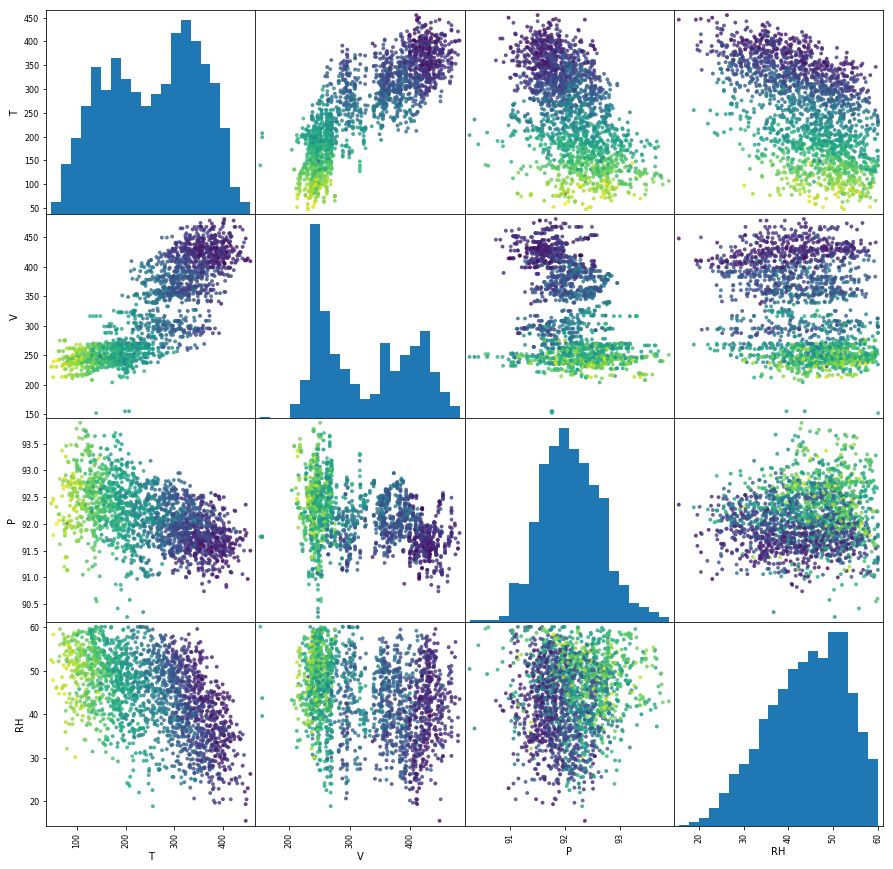

In [3]:
training_data = pd.read_csv("train_data.csv")
train_label = training_data['E']
del training_data['E']
train_data = training_data
pd.plotting.scatter_matrix(train_data,c=train_label,figsize=(15,15),hist_kwds={"bins":20},s=60,alpha=.8)

In [4]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(train_data,train_label)

In [5]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(trainX,trainy)
print("Accuracy: {}".format(lr.score(testX,testy)))
print("Coefficients: {}".format(lr.coef_))
print("Intercept: {}".format(lr.intercept_))

Accuracy: 0.9305815523365467
Coefficients: [-0.58278782 -0.17711866  2.6703871  -0.98556799]
Intercept: 1821.6089008174506


In [6]:
trainX, testX, trainy, testy = train_test_split(train_data,train_label)
lr= LinearRegression()
lr.fit(trainX,trainy)
print("Accuracy: {}".format(lr.score(testX,testy)))
print("Coefficients: {}".format(lr.coef_))
print("Intercept: {}".format(lr.intercept_))
W = lr.coef_
b = lr.intercept_

Accuracy: 0.9068441551815667
Coefficients: [-0.60146643 -0.16093818  2.5096509  -1.01785272]
Intercept: 1837.222062760552


In [7]:
def f(x):
    return x[0]*W[0]+x[1]*W[1]+x[2]*W[2]+x[3]*W[3] + b

test_data = pd.read_csv("test_data.csv")

testX = test_data.values
testX = testX.astype(np.float32) # Reverse this later
with open("submission2.csv","w") as sub:
    for i in range(len(testX)):
        sub.write("{}\n".format(f(testX[i])))